In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import matplotlib.pyplot as plt

# problem 1 a

In [12]:
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
    "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "response"
]

df = pd.read_csv('C:\\Users\\tanma\\Downloads\\spambase\\spambase.data', header=None, names=column_names)
X = df.iloc[:, :-1] 
y = y = df.iloc[:, -1]
means = X.mean(axis = 0)
std_devs = X.std(axis = 0)
for i, col in enumerate(list(X.columns)):
    X[col] = (X[col] - means[i])/std_devs[i]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm.ravel()
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision, recall, f1_score_, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

In [23]:
print("Confusion matrix")
print(cm)
print("Tp, fp, fn, tn")
print(tp, fp, fn, tn)
print(f"Accuracy: {accuracy}")
print(f"Error: {error}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score_}")

Confusion matrix
[[650  26]
 [ 63 412]]
Tp, fp, fn, tn
650 26 63 412
Accuracy: 0.9226759339704604
Error: 0.07732406602953956
precision: 0.9406392694063926
recall: 0.8673684210526316
f1_score: 0.9025191675794085


# problem 1 b

In [24]:
coefficients = model.coef_
rounded_coefs = np.round(coefficients, 5)
model_coefs_flat_list = rounded_coefs.flatten().tolist()
for column_name, coef in zip(column_names, model_coefs_flat_list):
    print(f"{column_name}: {coef}")

word_freq_make: -0.06999
word_freq_address: -0.17617
word_freq_all: 0.06594
word_freq_3d: 0.82619
word_freq_our: 0.40648
word_freq_over: 0.14798
word_freq_remove: 0.91364
word_freq_internet: 0.18272
word_freq_order: 0.14515
word_freq_mail: 0.0411
word_freq_receive: -0.08384
word_freq_will: -0.08077
word_freq_people: -0.01019
word_freq_report: 0.02326
word_freq_addresses: 0.37716
word_freq_free: 0.86363
word_freq_business: 0.4034
word_freq_email: 0.0564
word_freq_you: 0.1767
word_freq_credit: 0.59008
word_freq_your: 0.28477
word_freq_font: 0.23852
word_freq_000: 0.91533
word_freq_money: 0.15789
word_freq_hp: -2.65275
word_freq_hpl: -0.84144
word_freq_george: -4.18942
word_freq_650: 0.19678
word_freq_lab: -0.95549
word_freq_labs: -0.30704
word_freq_telnet: -0.38239
word_freq_857: -0.2263
word_freq_data: -0.71421
word_freq_415: -0.01644
word_freq_85: -0.75035
word_freq_technology: 0.44702
word_freq_1999: -0.01313
word_freq_parts: -0.14121
word_freq_pm: -0.38452
word_freq_direct: -0.15389


In [19]:
abs_arr = np.abs(coefficients)
print(np.sort(abs_arr))
print("Most important features are word_freq_george, char_freq_$, word_freq_000, word_freq_remove")

[[0.01018913 0.01313084 0.0164403  0.02326048 0.04109955 0.05640249
  0.06593655 0.06999427 0.07361317 0.08076619 0.08383853 0.09551073
  0.14120799 0.14515273 0.14798399 0.15388527 0.15788599 0.17616732
  0.17669572 0.18272462 0.18663275 0.19677814 0.20750889 0.21402608
  0.22630361 0.23852074 0.24053012 0.28477191 0.29251711 0.30704113
  0.37715831 0.38239123 0.38452191 0.40340332 0.40647693 0.44702207
  0.59008389 0.69888961 0.71420537 0.75035451 0.75514474 0.76533731
  0.82618822 0.84143813 0.86363438 0.90512998 0.9136418  0.91532604
  0.95548942 1.05487985 1.1793397  1.20578091 1.25150246 1.32643117
  1.58682417 2.65275286 4.1894196 ]]
Most important features are word_freq_george, char_freq_$, word_freq_000, word_freq_remove


In [20]:
positively_correlated_features = [column_names[i] for i in range(len(model_coefs_flat_list)) if model_coefs_flat_list[i] > 0]
negatively_correlated_features = [column_names[i] for i in range(len(model_coefs_flat_list)) if model_coefs_flat_list[i] < 0]
print("Positivley correlated features: ")
print(positively_correlated_features)
print("Negatively correlated features: ")
print(negatively_correlated_features)

Positivley correlated features: 
['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_650', 'word_freq_technology', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_longest', 'capital_run_length_total']
Negatively correlated features: 
['word_freq_make', 'word_freq_address', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'wo

# problem 1 c

In [21]:
thresholds = [0.25, 0.5, 0.75, 0.9]

for T in thresholds:
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= T).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    
    print(f"Threshold: {T}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("-----------")

Threshold: 0.25
Accuracy: 0.9131190269331017
Precision: 0.851782363977486
Recall: 0.9557894736842105
-----------
Threshold: 0.5
Accuracy: 0.9226759339704604
Precision: 0.9406392694063926
Recall: 0.8673684210526316
-----------
Threshold: 0.75
Accuracy: 0.8853171155516942
Precision: 0.9573333333333334
Recall: 0.7557894736842106
-----------
Threshold: 0.9
Accuracy: 0.8279756733275413
Precision: 0.9726962457337884
Recall: 0.6
-----------


In [20]:
print("Comments:")
print("At a low threshold, the model is more inclined to predict the positive class. This results in a high recall (few false negatives) but at the cost of precision (more false positives), as it's more likely to classify negative instances as positive.")
print("\n")
print("At T = 0.5, this balanced threshold maintains a high level of both precision and recall, indicating a good balance between correctly identifying positive cases and minimizing false positives. The model achieves the highest accuracy at this threshold.")
print("\n")
print("Increasing the threshold makes the model more conservative in predicting the positive class. The precision increases (fewer false positives), but recall decreases significantly (more false negatives), indicating that while the predictions are more reliable, many positive instances are missed.")
print("\n")
print("With a very high threshold, the model becomes extremely cautious about predicting positives. The precision is very high, meaning almost all positive predictions are correct, but the recall drops drastically. This setting leads to missing a large number of actual positive cases.")

Comments:
At a low threshold, the model is more inclined to predict the positive class. This results in a high recall (few false negatives) but at the cost of precision (more false positives), as it's more likely to classify negative instances as positive.


At T = 0.5, this balanced threshold maintains a high level of both precision and recall, indicating a good balance between correctly identifying positive cases and minimizing false positives. The model achieves the highest accuracy at this threshold.


Increasing the threshold makes the model more conservative in predicting the positive class. The precision increases (fewer false positives), but recall decreases significantly (more false negatives), indicating that while the predictions are more reliable, many positive instances are missed.


With a very high threshold, the model becomes extremely cautious about predicting positives. The precision is very high, meaning almost all positive predictions are correct, but the recall dro

# problem 2

In [26]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

In [27]:
def sigmoid(z):
    # Clip z values to avoid overflow in the exp function
    z_clipped = np.clip(z, -20, 20)
    return 1 / (1 + np.exp(-z_clipped))



def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    m = len(y)
    loss_history = []

    for i in range(iterations):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)

        # Gradient of the cross-entropy loss
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient

        # Compute cross-entropy loss
        epsilon = 1e-15
        predictions_clipped = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(predictions_clipped) + (1 - y) * np.log(1 - predictions_clipped))
        loss_history.append(loss)

    return weights, loss_history

In [30]:
learning_rates = [0.01, 0.1, 0.5]
iterations_list = [10, 50, 100]

results = {}
for lr in learning_rates:
    results[lr] = {}
    for iterations in iterations_list:
        weights, loss_history = logistic_regression(X_train_bias, y_train, lr, iterations)
        results[lr][iterations] = {
            'loss': loss_history[-1],
            'weights': weights
        }


In [31]:
metrics = {}
for lr in learning_rates:
    weights = results[lr][100]['weights']
    predictions = sigmoid(np.dot(X_test_bias, weights)) >= 0.5
    metrics[lr] = {
        'accuracy': accuracy_score(y_test, predictions),
        'precision': precision_score(y_test, predictions),
        'recall': recall_score(y_test, predictions),        
    }
    f1_score_value = f1_score(y_test, predictions)
    metrics[lr]['f1_score'] = f1_score_value

results, metrics

({0.01: {10: {'loss': 0.6551954272101309,
    'weights': array([-0.01108321,  0.00567508, -0.00092042,  0.00907472,  0.00254892,
            0.01146168,  0.01082677,  0.01518299,  0.00992598,  0.01081242,
            0.00617134,  0.01039718,  0.00071825,  0.00568073,  0.00273654,
            0.00933767,  0.01263275,  0.01227332,  0.00938871,  0.01287223,
            0.00830873,  0.01828019,  0.00458001,  0.01590962,  0.01019295,
           -0.01150624, -0.00955759, -0.00860779, -0.00692511, -0.00528982,
           -0.00743983, -0.00498005, -0.0042182 , -0.00542858, -0.00413557,
           -0.00666143, -0.00562328, -0.00889126, -0.00127806, -0.00604387,
           -0.00222467, -0.00468421, -0.00614455, -0.0064441 , -0.00519916,
           -0.00743744, -0.0068733 , -0.00185025, -0.00405694, -0.00233123,
           -0.0044482 , -0.0027103 ,  0.0108616 ,  0.01511105,  0.00272288,
            0.0048943 ,  0.01037306,  0.01229321])},
   50: {'loss': 0.5437253559087005,
    'weights': array([

In [32]:
print("The accuracy, precision, recall and f1 scores of our self implemented model is comparable with the model trained by using the package")

The accuracy, precision, recall and f1 scores of our self implemented model is comparable with the model trained by using the package


# problem 3 a

In [33]:
logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
n_folds = 8
k_range = range(1, 31)
X_train_c = np.ascontiguousarray(X_train)
X_test_c = np.ascontiguousarray(X_test)
y_train_c = np.ascontiguousarray(y_train)
y_test_c = np.ascontiguousarray(y_test)

accuracy_scores = []
precision_scores = []
recall_scores = []
error_scores = []
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Single call to cross_validate
    scores = cross_validate(knn, X_train_c, y_train_c, cv=cv, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
    
    # Append mean scores to lists
    accuracy_scores.append(np.mean(scores['test_accuracy']))
    precision_scores.append(np.mean(scores['test_precision']))
    recall_scores.append(np.mean(scores['test_recall']))
    # Calculate error rate as 1 - accuracy
    error_scores.append(1 - np.mean(scores['test_accuracy']))

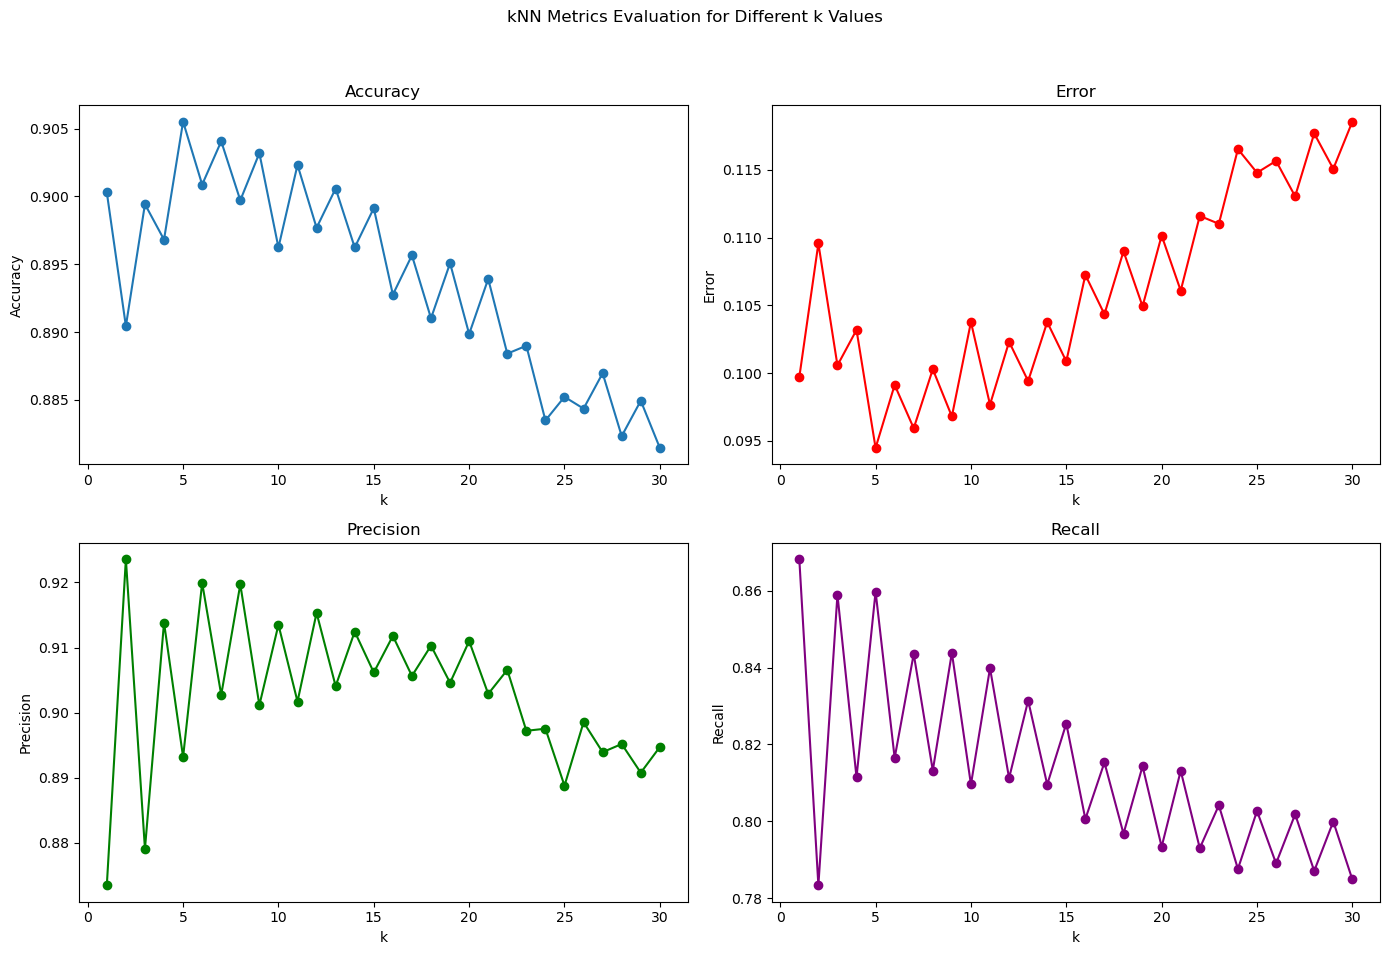

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('kNN Metrics Evaluation for Different k Values')

# Accuracy plot
axs[0, 0].plot(k_range, accuracy_scores, marker='o', linestyle='-')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('Accuracy')

# Error plot
axs[0, 1].plot(k_range, error_scores, marker='o', color='r', linestyle='-')
axs[0, 1].set_title('Error')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Error')

# Precision plot
axs[1, 0].plot(k_range, precision_scores, marker='o', color='g', linestyle='-')
axs[1, 0].set_title('Precision')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Precision')

# Recall plot
axs[1, 1].plot(k_range, recall_scores, marker='o', color='purple', linestyle='-')
axs[1, 1].set_title('Recall')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('Recall')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
k_best = k_range[np.argmin(error_scores)]
k_best, np.min(error_scores)

(5, 0.09449049905473927)

# problem 3 b

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_c, y_train_c)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions on training data
    y_pred_train = model.predict(X_train)
    # Predictions on testing data
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    error_train = 1 - accuracy_train
    
    # Calculate metrics for testing data
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    error_test = 1 - accuracy_test
    
    return {
        'accuracy_train': accuracy_train, 'error_train': error_train,
        'precision_train': precision_train, 'recall_train': recall_train,
        'accuracy_test': accuracy_test, 'error_test': error_test,
        'precision_test': precision_test, 'recall_test': recall_test,
    }


In [41]:
models = {
    'KNN': knn,
    'LDA': lda_model,
    'Logistic Regression': logistic_regression_model
}

for name, model in models.items():
    metrics = evaluate_model(model, X_train_c, y_train_c, X_test_c, y_test_c)
    print(f"{name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("----------")


KNN Metrics:
accuracy_train: 0.9310
error_train: 0.0690
precision_train: 0.9309
recall_train: 0.9310
accuracy_test: 0.9001
error_test: 0.0999
precision_test: 0.9001
recall_test: 0.9001
----------
LDA Metrics:
accuracy_train: 0.8867
error_train: 0.1133
precision_train: 0.8892
recall_train: 0.8867
accuracy_test: 0.8853
error_test: 0.1147
precision_test: 0.8898
recall_test: 0.8853
----------
Logistic Regression Metrics:
accuracy_train: 0.9258
error_train: 0.0742
precision_train: 0.9257
recall_train: 0.9258
accuracy_test: 0.9227
error_test: 0.0773
precision_test: 0.9236
recall_test: 0.9227
----------


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
print("Logistic Regression is the best performing model, showing the highest accuracy, precision, and recall on both training and testing data, with strong generalization capabilities.")
print("LDA is the least effective, with consistently lower metrics across the board. ")
print("KNN holds a middle ground, with high training performance but a notable drop when applied to testing data")

Logistic Regression is the best performing model, showing the highest accuracy, precision, and recall on both training and testing data, with strong generalization capabilities.
LDA is the least effective, with consistently lower metrics across the board. 
KNN holds a middle ground, with high training performance but a notable drop when applied to testing data


# problem 3 c

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

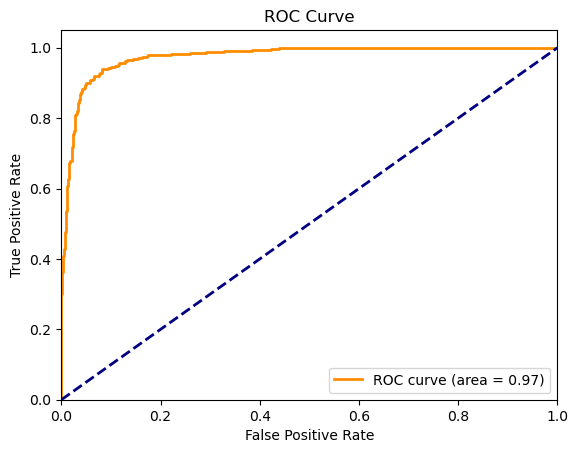

In [46]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# problem 3 d

In [47]:
thresholds = np.arange(0.0, 1.1, 0.1)
fpr_list = []
tpr_list = []

for T in thresholds:    
    y_pred = (y_probs >= T).astype(int)
    
    # Calculate False Positives, True Positives, False Negatives, True Negatives
    FP = np.sum((y_pred == 1) & (y_test == 0))
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FN = np.sum((y_pred == 0) & (y_test == 1))
    TN = np.sum((y_pred == 0) & (y_test == 0))
    
    # Calculate False Positive Rate and True Positive Rate
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    
    fpr_list.append(FPR)
    tpr_list.append(TPR)


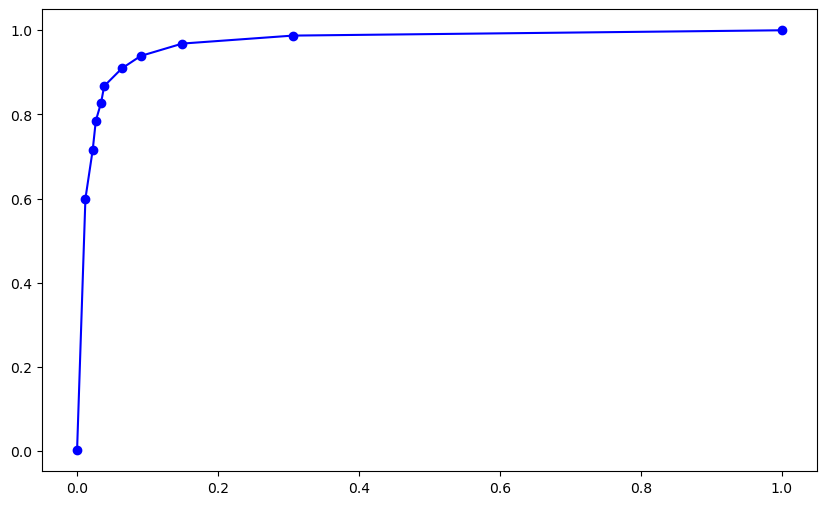

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', color='b', label='Manual ROC Curve')

In [51]:
print("The difference between the manual and package plotted ROC curve is in the smoothness")
print("By increasing the number of thresholds used to compute the true positive and false positive rates, the manually plotted ROC curve can become smoother and more similar to the curve generated by a package.")

The difference between the manual and package plotted ROC curve is in the smoothness
By increasing the number of thresholds used to compute the true positive and false positive rates, the manually plotted ROC curve can become smoother and more similar to the curve generated by a package.


# problem 4 a

In [52]:
def k_fold_cross_validation(X, y, model, k):
    fold_size = len(X) // k
    validation_errors = []

    for i in range(k):
        # Create indices for the kth fold
        start, end = i * fold_size, (i + 1) * fold_size
        X_valid = X[start:end]
        y_valid = y[start:end]
        X_train = np.concatenate((X[:start], X[end:]))
        y_train = np.concatenate((y[:start], y[end:]))

        # Train the model on the training set and validate on the validation set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        error = 1 - accuracy_score(y_valid, y_pred)
        validation_errors.append(error)

    # Compute the average validation error
    average_validation_error = np.mean(validation_errors)
    return average_validation_error

# problem 4 b

In [55]:
k_values = [5, 6, 7, 8, 9, 10]
models = [LogisticRegression(), LinearDiscriminantAnalysis()]

In [58]:
# The rest of your code can go here
for k in k_values:
    for model in models:
        model_name = type(model).__name__
        average_validation_error = k_fold_cross_validation(X, y, model, k)
        print(f'Average validation error for {model_name} with k={k}: {average_validation_error:.3f}')

Average validation error for LogisticRegression with k=5: 0.142


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


Average validation error for LinearDiscriminantAnalysis with k=5: 0.184
Average validation error for LogisticRegression with k=6: 0.124


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lin

Average validation error for LinearDiscriminantAnalysis with k=6: 0.168
Average validation error for LogisticRegression with k=7: 0.128


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lin

Average validation error for LinearDiscriminantAnalysis with k=7: 0.164
Average validation error for LogisticRegression with k=8: 0.117


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lin

Average validation error for LinearDiscriminantAnalysis with k=8: 0.157
Average validation error for LogisticRegression with k=9: 0.105


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lin

Average validation error for LinearDiscriminantAnalysis with k=9: 0.151
Average validation error for LogisticRegression with k=10: 0.110


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lin

Average validation error for LinearDiscriminantAnalysis with k=10: 0.148


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


# problem 4 c

In [60]:
print("Logistic Regression has a lower average validation error compared to Linear Discriminant Analysis for all values of k. This indicates that, on average, Logistic Regression is performing better in terms of prediction accuracy.")
print("Both models show a general trend of improved performance (lower error rates) as k increases.")
print("Logistic regression performs better because of its non reliance on the assumption that each variable has a normal distribution. However, LDA makes this assumption which affects the model's performance")

Logistic Regression has a lower average validation error compared to Linear Discriminant Analysis for all values of k. This indicates that, on average, Logistic Regression is performing better in terms of prediction accuracy.
Both models show a general trend of improved performance (lower error rates) as k increases.
Logistic regression performs better because of its non reliance on the assumption that each variable has a normal distribution. However, LDA makes this assumption which affects the model's performance
